In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sales = pd.read_csv('E:/DQLab/Dataset/sales_subset.csv', sep=',')
print(sales.head())

   index  store type  department        date  weekly_sales  is_holiday  \
0      0      1    A           1  2010-02-05      24924.50       False   
1      1      1    A           1  2010-03-05      21827.90       False   
2      2      1    A           1  2010-04-02      57258.43       False   
3      3      1    A           1  2010-05-07      17413.94       False   
4      4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  


In [2]:
# Print sales information  
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales          10774 non-null  float64
 6   is_holiday            10774 non-null  bool   
 7   temperature_c         10774 non-null  float64
 8   fuel_price_usd_per_l  10774 non-null  float64
 9   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 768.2+ KB
None


In [3]:
sales = sales.drop('index', axis=1)

In [4]:
# Convert date column to datetime data type
sales['date'] = pd.to_datetime(sales['date'])

print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   store                 10774 non-null  int64         
 1   type                  10774 non-null  object        
 2   department            10774 non-null  int64         
 3   date                  10774 non-null  datetime64[ns]
 4   weekly_sales          10774 non-null  float64       
 5   is_holiday            10774 non-null  bool          
 6   temperature_c         10774 non-null  float64       
 7   fuel_price_usd_per_l  10774 non-null  float64       
 8   unemployment          10774 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 684.0+ KB
None


In [51]:
print(sales.describe())

              store    department   weekly_sales  temperature_c  \
count  10774.000000  10774.000000   10774.000000   10774.000000   
mean      15.441897     45.218118   23843.950149      15.731978   
std       11.534511     29.867779   30220.387557       9.922446   
min        1.000000      1.000000   -1098.000000      -8.366667   
25%        4.000000     20.000000    3867.115000       7.583333   
50%       13.000000     40.000000   12049.065000      16.966667   
75%       20.000000     72.000000   32349.850000      24.166667   
max       39.000000     99.000000  293966.050000      33.827778   

       fuel_price_usd_per_l  unemployment  
count          10774.000000  10774.000000  
mean               0.749746      8.082009  
std                0.059494      0.624355  
min                0.664129      3.879000  
25%                0.708246      7.795000  
50%                0.743381      8.099000  
75%                0.781421      8.360000  
max                1.107674      9.765000  


In [52]:
# Print the maximum of the date column
print("Last sales :", sales["date"].max())

# Print the minimum of the date column
print("First sales :", sales["date"].min())

Last sales : 2012-10-26 00:00:00
First sales : 2010-02-05 00:00:00


In [6]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg(iqr))

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


In [7]:
sales_1_1 = sales[(sales['store'] == 1) & (sales['department'] == 1)]
print(sales_1_1)

    store type  department       date  weekly_sales  is_holiday  \
0       1    A           1 2010-02-05      24924.50       False   
1       1    A           1 2010-03-05      21827.90       False   
2       1    A           1 2010-04-02      57258.43       False   
3       1    A           1 2010-05-07      17413.94       False   
4       1    A           1 2010-06-04      17558.09       False   
5       1    A           1 2010-07-02      16333.14       False   
6       1    A           1 2010-08-06      17508.41       False   
7       1    A           1 2010-09-03      16241.78       False   
8       1    A           1 2010-10-01      20094.19       False   
9       1    A           1 2010-11-05      34238.88       False   
10      1    A           1 2010-12-03      22517.56       False   
11      1    A           1 2011-01-07      15984.24       False   

    temperature_c  fuel_price_usd_per_l  unemployment  
0        5.727778              0.679451         8.106  
1        8.05555

In [53]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values("date")

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1["cum_weekly_sales"] = sales["weekly_sales"].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1["cum_max_sales"] = sales["weekly_sales"].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

         date  weekly_sales  cum_weekly_sales  cum_max_sales
0  2010-02-05      24924.50          24924.50       24924.50
1  2010-03-05      21827.90          46752.40       24924.50
2  2010-04-02      57258.43         104010.83       57258.43
3  2010-05-07      17413.94         121424.77       57258.43
4  2010-06-04      17558.09         138982.86       57258.43
5  2010-07-02      16333.14         155316.00       57258.43
6  2010-08-06      17508.41         172824.41       57258.43
7  2010-09-03      16241.78         189066.19       57258.43
8  2010-10-01      20094.19         209160.38       57258.43
9  2010-11-05      34238.88         243399.26       57258.43
10 2010-12-03      22517.56         265916.82       57258.43
11 2011-01-07      15984.24         281901.06       57258.43


In [54]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])
print(store_types)

      store type  department       date  weekly_sales  is_holiday  \
0         1    A           1 2010-02-05      24924.50       False   
901       2    A           1 2010-02-05      35034.06       False   
1798      4    A           1 2010-02-05      38724.42       False   
2699      6    A           1 2010-02-05      25619.00       False   
3593     10    B           1 2010-02-05      40212.84       False   
4495     13    A           1 2010-02-05      46761.90       False   
5408     14    A           1 2010-02-05      32842.31       False   
6293     19    A           1 2010-02-05      21500.58       False   
7199     20    A           1 2010-02-05      46021.21       False   
8109     27    A           1 2010-02-05      32313.79       False   
9009     31    A           1 2010-02-05      18187.71       False   
9899     39    A           1 2010-02-05      21244.50       False   

      temperature_c  fuel_price_usd_per_l  unemployment  
0          5.727778              0.679451   

In [24]:
# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])
print(store_depts.head())

    store type  department       date  weekly_sales  is_holiday  \
0       1    A           1 2010-02-05      24924.50       False   
12      1    A           2 2010-02-05      50605.27       False   
24      1    A           3 2010-02-05      13740.12       False   
36      1    A           4 2010-02-05      39954.04       False   
48      1    A           5 2010-02-05      32229.38       False   

    temperature_c  fuel_price_usd_per_l  unemployment  
0        5.727778              0.679451         8.106  
12       5.727778              0.679451         8.106  
24       5.727778              0.679451         8.106  
36       5.727778              0.679451         8.106  
48       5.727778              0.679451         8.106  


In [60]:
# Count the number of stores of each type
store_counts = sales["type"].value_counts()
print("Store type count:\n", store_counts)

# Get the proportion of stores of each type
store_props = sales["type"].value_counts(normalize=True)
print("Store type proportion :\n", store_props)

Store type count:
 A    9872
B     902
Name: type, dtype: int64
Store type proportion :
 A    0.91628
B    0.08372
Name: type, dtype: float64


In [61]:
# Count the number of each department number and sort
dept_counts_sorted = sales["department"].value_counts(sort=True)
print("Department count :\n", dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = sales["department"].value_counts(sort=True, normalize=True)
print("Department proportion :\n", dept_props_sorted)

Department count :
 95    144
91    144
18    144
26    144
34    144
     ... 
50     72
78     56
77     39
39      7
43      2
Name: department, Length: 80, dtype: int64
Department proportion :
 95    0.013366
91    0.013366
18    0.013366
26    0.013366
34    0.013366
        ...   
50    0.006683
78    0.005198
77    0.003620
39    0.000650
43    0.000186
Name: department, Length: 80, dtype: float64


In [66]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()
print(sales_by_type)

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

type
A    2.337163e+08
B    2.317840e+07
Name: weekly_sales, dtype: float64
type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [67]:
# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type", "is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


In [69]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

        amin       amax          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08


In [70]:
# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")[["unemployment", "fuel_price_usd_per_l"]].agg([min, max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

     unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


In [14]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(index="type", values="weekly_sales")

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [15]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(index="type", columns="is_holiday", values="weekly_sales")

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


In [16]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(index="department", columns="type", values="weekly_sales", fill_value=0))

type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
...                   ...            ...
95          123933.787121   77082.102500
96           21367.042857    9528.538333
97           28471.266970    5828.873333
98           12875.423182     217.428333
99             379.123659       0.000000

[80 rows x 2 columns]


In [17]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(index="department", columns="type", values="weekly_sales", fill_value=0, margins=True))

type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          21367.042857    9528.538333  20337.607681
97          28471.266970    5828.873333  26584.400833
98          12875.423182     217.428333  11820.590278
99            379.123659       0.000000    379.123659
All         23674.667242   25696.678370  23843.950149

[81 rows x 3 columns]


In [18]:
salesDateIndex = sales.set_index('date')
print(salesDateIndex)

            store type  department  weekly_sales  is_holiday  temperature_c  \
date                                                                          
2010-02-05      1    A           1      24924.50       False       5.727778   
2010-03-05      1    A           1      21827.90       False       8.055556   
2010-04-02      1    A           1      57258.43       False      16.816667   
2010-05-07      1    A           1      17413.94       False      22.527778   
2010-06-04      1    A           1      17558.09       False      27.050000   
...           ...  ...         ...           ...         ...            ...   
2011-12-09     39    A          99        895.00       False       9.644444   
2012-02-03     39    A          99        350.00       False      15.938889   
2012-06-08     39    A          99        450.00       False      27.288889   
2012-07-13     39    A          99          0.06       False      25.644444   
2012-10-05     39    A          99        915.00    

In [19]:
weekly_sales2012 = salesDateIndex.loc['2012-01':'2012-12',:].resample('M')['weekly_sales'].mean()
print(weekly_sales2012.sort_values(ascending=False))

date
2012-10-31    492.111333
2012-02-29    241.396111
2012-09-30    154.360000
2012-06-30     85.561250
2012-04-30     81.712727
2012-01-31     76.886667
2012-05-31     54.805000
2012-03-31     52.526250
2012-07-31     10.452500
2012-08-31    -40.168571
Name: weekly_sales, dtype: float64


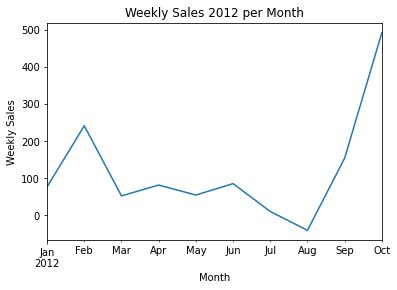

In [37]:
weekly_sales2012.plot()
plt.title("Weekly Sales 2012 per Month")
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

In [32]:
weekly_sales2010 = salesDateIndex.loc['2010-01':'2010-12',:].resample('M')['weekly_sales'].mean()
print(weekly_sales2010.sort_values(ascending=False))

date
2010-04-30    26233.064359
2010-12-31    25943.827959
2010-06-30    25929.632923
2010-02-28    25687.334612
2010-05-31    25051.821370
2010-07-31    24849.061556
2010-08-31    24653.145092
2010-09-30    24143.179197
2010-11-30    23847.001187
2010-03-31    23680.214688
2010-10-31    21973.659168
Name: weekly_sales, dtype: float64


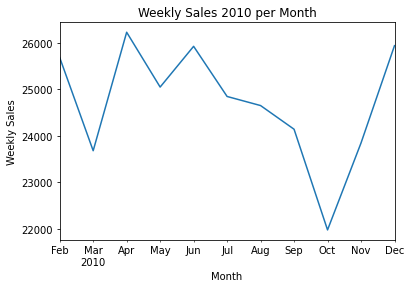

In [38]:
weekly_sales2010.plot()
plt.title("Weekly Sales 2010 per Month")
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

In [34]:
weekly_sales2011 = salesDateIndex.loc['2011-01':'2011-12',:].resample('M')['weekly_sales'].mean()
print(weekly_sales2011.sort_values(ascending=False))

date
2011-01-31    21839.340577
2011-02-28     4860.688333
2011-06-30     2749.965882
2011-04-30     2365.484286
2011-05-31     2039.074444
2011-03-31     1879.304737
2011-11-30      917.436071
2011-12-31      368.390690
2011-08-31      278.871852
2011-09-30      128.611111
2011-07-31       46.836000
2011-10-31       41.252857
Name: weekly_sales, dtype: float64


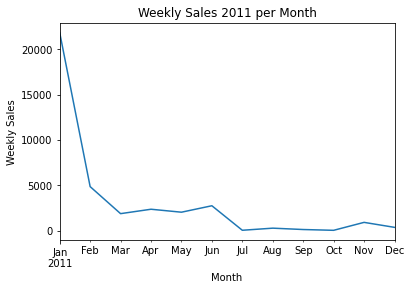

In [39]:
weekly_sales2011.plot()
plt.title("Weekly Sales 2011 per Month")
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()